In [213]:
%matplotlib inline

import notebook
from notebook.nbextensions import enable_nbextension
enable_nbextension('notebook', 'usability/codefolding/main')
import numpy as np
from astropy.time import Time
from astropy.io import fits
import glob
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/vs/Dropbox/Python')

bigfontsize=20
labelfontsize=16
tickfontsize=16
sns.set_context('talk')
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })

In [214]:
#input_target = sys.argv[1]
#input_channel = sys.argv[2]
#catalog = sys.argv[3]

input_target = 'omegaCen_2'
input_channel = '3p6um'
catalog = 'kaluzny_field2_ch1.als'

In [215]:
if (input_channel == '1' or input_channel == '3p6um'):
	channel = '3p6um'
if (input_channel =='2' or input_channel == '4p5um'):
	channel = '4p5um'

In [216]:
path = '/Volumes/Khaleesi/CRRP/Globular_Cluster_Output/omegaCen/'+ input_target +'_'+ channel + '/' + input_target + '_e*_' + channel + '_dn.fits'
input_image_list = glob.glob(path)
input_lc_data = input_target + '_' + channel + '.cal'

mjds = np.zeros(len(input_image_list))

for count in range(0, len(input_image_list)):
	hdulist = fits.open(input_image_list[count])
	prihdr = hdulist[0].header
	date_obs = Time(prihdr['date_obs'])
	mjds[count] = date_obs.mjd

epoch1_ids, kal_ids = np.loadtxt(input_target + '_' + channel + '_rrl.tfr', skiprows=14, usecols=(0, 15), unpack=True)
k_ids, periods = np.loadtxt(catalog, usecols=(0,5), unpack=True)
with open(input_lc_data) as input:
	lines = []
	while True:
		line = list(itertools.islice(input, 3))
		if line:
			lines.append(line)
		else:
			break

num_stars = len(lines)


In [217]:
kaluzny = pd.read_csv('kaluzny_catalogues/kaluzny2004_reformatted', delim_whitespace=True, header=None, names=('ID', 'RA', 'Dec', 'Period', 'Vmag', 'Type'))

In [218]:
#path

In [219]:
#mjds

In [227]:
kaluzny

,ID,RA,Dec,Period,Vmag,Type,als_id
0,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0,533.0
1,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0,305.0
2,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0,2420.0
3,V7,13:27:00.90,-47:14:00.5,0.713000,14.08,RR0,NaN
4,V8,13:27:48.45,-47:28:20.3,0.521329,13.90,RR0,NaN
5,V9,13:25:59.58,-47:26:24.0,0.523480,14.10,RR0,2553.0
6,V10,13:26:06.99,-47:24:36.6,0.374976,14.31,RR1,6237.0
7,V11,13:26:30.59,-47:23:01.6,0.564789,14.20,RR0,1498.0
8,V12,13:26:27.21,-47:24:06.2,0.386769,14.32,RR1,5068.0
9,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0,562.0


In [221]:
als_file = input_target + '_e1_' + channel + '_dn.cal'
als_df = pd.read_csv(als_file, delim_whitespace=True, header=None, names=('als_id', 'xc', 'yc', 'mag', 'err', 'lcorr'))

In [228]:
als_df

,als_id,xc,yc,mag,err,lcorr
0,3,18.23,188.16,15.732,0.098,0.979
1,4,18.26,234.23,15.361,0.061,0.980
2,5,18.63,85.36,14.081,0.084,0.973
3,6,18.80,96.21,15.022,0.070,0.974
4,7,19.79,495.27,16.713,0.126,0.968
5,8,20.06,107.68,16.301,0.092,0.975
6,9,20.07,544.12,14.366,0.332,0.962
7,10,20.35,291.82,16.151,0.075,0.981
8,11,20.42,89.59,15.433,0.124,0.973
9,12,20.50,228.05,16.647,0.129,0.981


In [223]:
#input_image_list

In [229]:
kaluzny.ID[kaluzny['Period'].isin(period)].values[0]



'V263'

In [230]:
period


array([ 1.012158])

IndexError: index 19 is out of bounds for axis 1 with size 19

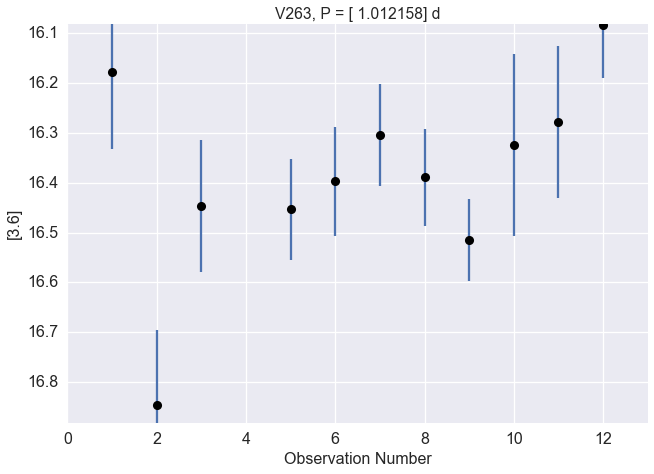

In [234]:
for rrl in range(len(epoch1_ids)):
    k_a_id = kal_ids[rrl]
    ep1_id = epoch1_ids[rrl]
    period = periods[np.where(kal_ids==k_a_id)]
    #df.loc[df['column_name'] == some_value]
    cat_id = kaluzny.ID[kaluzny['Period'].isin(period)].values[0]
    kaluzny.loc[kaluzny['ID'] == cat_id, 'als_id'] = ep1_id   
    num_frames = 12
    objects = np.zeros((num_stars, (num_frames*2) + 3))
    for star in np.arange(0,num_stars):
        data = "".join(lines[star])
        data = data.split()
        objects[star][0] = data[0] ## ID
        objects[star][1] = data[1] ## XC
        objects[star][2] = data[2] ## YC
        for epoch in np.arange(0,(num_frames*2), 2):
            objects[star][epoch + 3]  = data[epoch + 3] ## mag
            objects[star][epoch + 4] = data[epoch + 4] ## err
        if objects[star][0] == epoch1_ids[rrl]:
            best_star = star
            break
    mag = np.zeros(num_frames)
    err = np.zeros(num_frames)
    for epoch in np.arange(0,num_frames):
        mag[epoch] = objects[best_star][(epoch*2) + 3]  
        err[epoch] = objects[best_star][(epoch*2) + 4] 
    #print 'matched star' + str(k_a_id) + 'to ' + str(cat_id) + 'with period ' + str(period)
    idx = np.argsort(mjds)
    mjds = mjds[idx]
    mag = mag[idx]
    err = err[idx]
    phase = (mjds / period) - np.floor(mjds / period)
    phase = np.concatenate((phase,(phase+1.0),(phase+2.0),(phase+3.0),(phase+4.0)))
    
    mag_long  = np.concatenate((mag, mag, mag, mag, mag))
    
    err_long = np.concatenate((err, err, err, err, err))
    obs = np.arange(1, num_frames+1, 1)


    output = 'plots/' + str(cat_id) + '_rrlyrae.data'
    output_file = open(output, "w")

    for frame in np.arange(0, num_frames):
        output_file.write("{0:.8f} {1:.3f} {2:.3f} \n".format(mjds[frame], mag[frame], err[frame]))
    
    output_file.close()
    ## Sanity check plot

    mp.close()
    mp.clf()
    axp1 = mp.subplot(111)

    axp1.axis([0,2.5,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])


    axp1.errorbar(phase, mag_long, yerr=err_long, ls='None')
    axp1.plot(phase, mag_long, 'ko', ls='None')
    mp.xlabel("Phase")
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(cat_id + ', P = ' + str(period) +' d')
    #mp.show()

    mp.savefig('plots/' + str(cat_id) +'.pdf')

    mp.close()
    mp.clf()
    axp2 = mp.subplot(111)
    axp2.invert_yaxis()

    dates = np.concatenate((mjds, mjds, mjds, mjds, mjds))
    axp2.axis([0,num_frames+1,(np.average(mag) + 0.4),(np.average(mag) - 0.4)])
    axp2.errorbar(obs, mag, yerr=err, ls='None')

    axp2.plot(obs, mag, 'ko', ls='None')
    mp.xlabel('Observation Number')
    if (channel == '3p6um'): mp.ylabel('[3.6]')
    if (channel == '4p5um'): mp.ylabel('[4.5]')
    mp.title(cat_id + ', P = ' + str(period) +' d')
    mp.savefig('plots/' + str(cat_id) +'_timeseries.pdf')


In [ ]:
#print kaluzny.ID[kaluzny['Period'].isin(period)].values[0]


In [ ]:
#str(cat_id)



In [235]:
len(epoch1_ids)

20

In [231]:
sum(kaluzny.als_id>0)

19

In [ ]:
outfile = input_target + '_' + channel + '_rrl' + '_matched_to_kaluzny.cal'
print outfile


In [ ]:
#als_df

In [ ]:
#kaluzny

In [232]:
merged_tables = als_df.merge(kaluzny, on='als_id')

In [233]:
merged_tables

,als_id,xc,yc,mag,err,lcorr,ID,RA,Dec,Period,Vmag,Type
0,305,100.77,98.46,16.405,0.088,0.988,V4,13:26:12.93,-47:24:18.8,0.627320,13.83,RR0
1,533,144.71,62.95,16.749,0.108,0.990,V3,13:25:56.15,-47:25:53.8,0.841258,14.01,RR0
2,562,149.76,264.26,12.426,0.033,0.991,V13,13:25:58.18,-47:25:21.6,0.669039,13.92,RR0
3,929,209.02,530.03,14.547,0.051,0.987,V68,13:26:12.80,-47:19:35.7,0.534609,14.04,RR1
4,1291,262.87,272.70,16.893,0.050,1.003,V15,13:26:27.11,-47:24:38.0,0.810642,14.04,RR0
5,1498,289.99,261.93,16.112,0.053,1.005,V11,13:26:30.59,-47:23:01.6,0.564789,14.20,RR0
6,2053,360.65,552.18,17.189,0.109,0.994,V94,13:25:57.06,-47:22:46.1,0.253936,14.60,RR1
7,2169,374.65,306.70,15.864,0.038,1.012,V47,13:25:56.46,-47:24:12.0,0.485303,14.14,RR1
8,2420,409.59,129.72,16.313,0.087,1.008,V5,13:26:18.33,-47:23:12.4,0.515274,14.00,RR0
9,2553,426.23,166.23,15.484,0.100,1.009,V9,13:25:59.58,-47:26:24.0,0.523480,14.10,RR0


In [ ]:
merged_tables.to_csv(outfile, sep='\t', header=True, index=False)

In [236]:
epoch1_ids

array([  533.,   305.,  2420.,  2553.,  6237.,  1498.,  5068.,   562.,
        1291.,  3961.,  2169.,  3994.,  3467.,  2918.,  8527.,   929.,
        2053.,  7264.,  8909.,  6412.])

In [240]:
rrl

19

In [238]:
kal_ids

array([  8.,   6.,  20.,   9.,  10.,   2.,  14.,   3.,  15.,   4.,   5.,
         1.,   7.,  13.,  17.,  19.,  16.,  11.,  18.,  12.])

In [239]:
len(kal_ids)

20

In [242]:
range(len(epoch1_ids))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [243]:
periods

array([ 0.841258,  0.62732 ,  0.515274,  0.52348 ,  0.374976,  0.564789,
        0.386769,  0.669039,  0.810642,  0.380812,  0.485303,  0.772915,
        0.36988 ,  0.407266,  0.564451,  0.534609,  0.253936,  0.3332  ,
        1.012158])

In [244]:
len(periods)

19